In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean
import netCDF4 as nc


In [2]:
data_path = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/'
mes_date = 20170615

d=nc.Dataset(data_path + 'ROMEO.01_1d_wo_{0}.nc'.format(mes_date))
print(d.variables['wo'])
print(d.variables['depthw'])


<class 'netCDF4._netCDF4.Variable'>
float32 wo(time_counter, depthw, y, x)
    units: m/s
    _FillValue: -1e+30
    long_name: Vertical_Velocity
    online_operation: N/A
    axis: TZYX
    coordinates: depthw nav_lat nav_lon
    standard_name: upward_sea_water_velocity
unlimited dimensions: time_counter
current shape = (1, 50, 3896, 1903)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 depthw(depthw)
    standard_name: depth
    long_name: Vertical W Levels
    units: m
    axis: Z
    positive: down
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [3]:
t=nc.Dataset( data_path + 'ROMEO.01_1d_thetao_{0}_grid_T.nc'.format(mes_date))
print(t.variables['thetao'])
print(t.variables['deptht'])
sfile = data_path + 'ROMEO.01_1d_so_{0}_grid_T.nc'.format(mes_date)
sal_nc = nc.Dataset(sfile)
print(sal_nc.variables['so'])

<class 'netCDF4._netCDF4.Variable'>
float32 thetao(time_counter, deptht, y, x)
    _FillValue: 1e+20
    standard_name: sea_water_potential_temperature
    long_name: sea_water_potential_temperature
    units: degree_C
    online_operation: average
    interval_operation: 200 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 200 s)
    cell_measures: area: area
    coordinates: time_centered deptht nav_lat nav_lon
    missing_value: 1e+20
unlimited dimensions: time_counter
current shape = (1, 50, 3896, 1903)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    name: deptht
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 so(time_counter, deptht, y, x)
    _FillValue: 1e+20
    standard_name: sea_water_salinity
    long_name: sea_water_salinity
    u

In [4]:
home_folder = '/nethome/manra003/analysis/dispersion/outputs/env_out/'
output_folder = home_folder + '2017_dec/'

# w_ds=xr.load_dataset(data_path + 'ROMEO.01_1d_uo_{0}_grid_U.nc'.format(mes_date))
w_ds=xr.load_dataset(data_path + 'ROMEO.01_1d_wo_{0}.nc'.format(mes_date))

temp_ds = xr.load_dataset(data_path + 'ROMEO.01_1d_thetao_{0}_grid_T.nc'.format(mes_date))

sal_ds = xr.load_dataset(data_path + 'ROMEO.01_1d_so_{0}_grid_T.nc'.format(mes_date))

temp_ds


<xarray.Dataset>
Dimensions:              (y: 3896, x: 1903, nvertex: 4, deptht: 50, axis_nbounds: 2, time_counter: 1)
Coordinates:
  * deptht               (deptht) float32 0.3953 1.201 2.041 ... 504.1 542.0
  * time_counter         (time_counter) datetime64[ns] 2017-06-15T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    nav_lat              (y, x) float32 -78.39 -78.39 -78.39 ... 71.19 71.16
    nav_lon              (y, x) float32 -97.91 -97.84 -97.78 ... 66.27 66.28
    bounds_lon           (y, x, nvertex) float32 -97.94 -97.88 ... 66.32 66.31
    bounds_lat           (y, x, nvertex) float32 -78.4 -78.4 ... 71.15 71.18
    deptht_bounds        (deptht, axis_nbounds) float32 0.0 0.7943 ... 561.9
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] 2017-06-...
    thetao               (time_counter, deptht, y, x) float32 nan nan ... nan
Attributes: (12/14)
    name:                         ROMEO.01_1d_20170601_20170630_thetao_grid_T3D
    description:                  Created by xios
    title:                        Created by xios
    Conventions:                  CF-1.6
    timeStamp:                    2021-Jan-09 07:24:10 GMT
    uuid:                         0366566c-fa90-4002-8ddd-c689840f5329
    ...                           ...
    DOMAIN_type:                  box
    original_DOMAIN_size_global:  [5762 3963]
    comment:                      Global domain halo removed
    nemo_rebuild_version:         0.3.1-beta (31-03-2020)
    history:                      Wed Mar 24 17:10:04 2021: ncks -7 -O -C --n...
    NCO:                          netCDF Operators version 4.9.8 (Homepage = ...

In [5]:
w_ds['depthw'].values, temp_ds['deptht']

(array([  0.       ,   0.7942803,   1.616721 ,   2.47601  ,   3.3779614,
          4.329307 ,   5.3378363,   6.412553 ,   7.5638523,   8.803716 ,
         10.1459255,  11.6062975,  13.20293  ,  14.956459 ,  16.890316 ,
         19.030972 ,  21.408169 ,  24.055082 ,  27.008436 ,  30.3085   ,
         33.998974 ,  38.12671  ,  42.741253 ,  47.894207 ,  53.63839  ,
         60.026894 ,  67.11201  ,  74.94415  ,  83.57095  ,  93.03649  ,
        103.3809   , 114.64039  , 126.84771  , 140.03305  , 154.22537  ,
        169.45395  , 185.75018  , 203.1495   , 221.69312  , 241.42967  ,
        262.41684  , 284.72247  , 308.42575  , 333.61777  , 360.40222  ,
        388.89545  , 419.22656  , 451.53702  , 485.98007  , 522.7198   ],
       dtype=float32),
 <xarray.DataArray 'deptht' (deptht: 50)>
 array([3.952819e-01, 1.201226e+00, 2.041416e+00, 2.921255e+00, 3.847000e+00,
        4.825891e+00, 5.866306e+00, 6.977921e+00, 8.171897e+00, 9.461089e+00,
        1.086027e+01, 1.238635e+01, 1.405869e+01

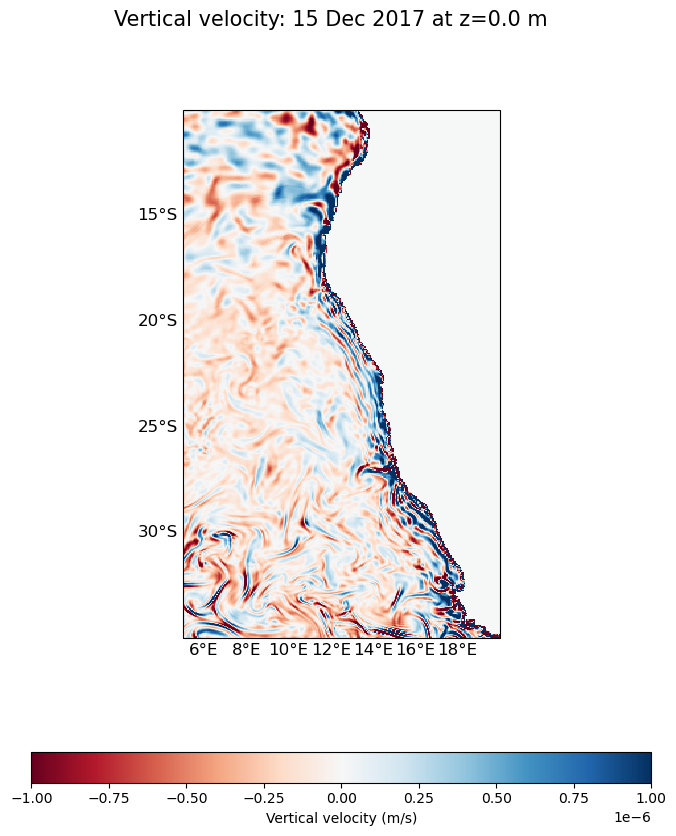

In [6]:

custom_size=12
fig = plt.figure(figsize=(8,10), dpi=100)
fig.suptitle("Vertical velocity: 15 Dec 2017 at z={0} m".format(w_ds.depthw[0].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=1)

# temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(w_ds.nav_lon[1249:1750, 1499:], w_ds.nav_lat[1249:1750, 1499:], w_ds.wo[0, 1, 1250:1750, 1500:], cmap="RdBu", vmin=-1e-06, vmax=1e-06)
# ax1.set_xlim(10,20)
# ax1.set_ylim(-35,-20)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,-10)
fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Vertical velocity (m/s)')

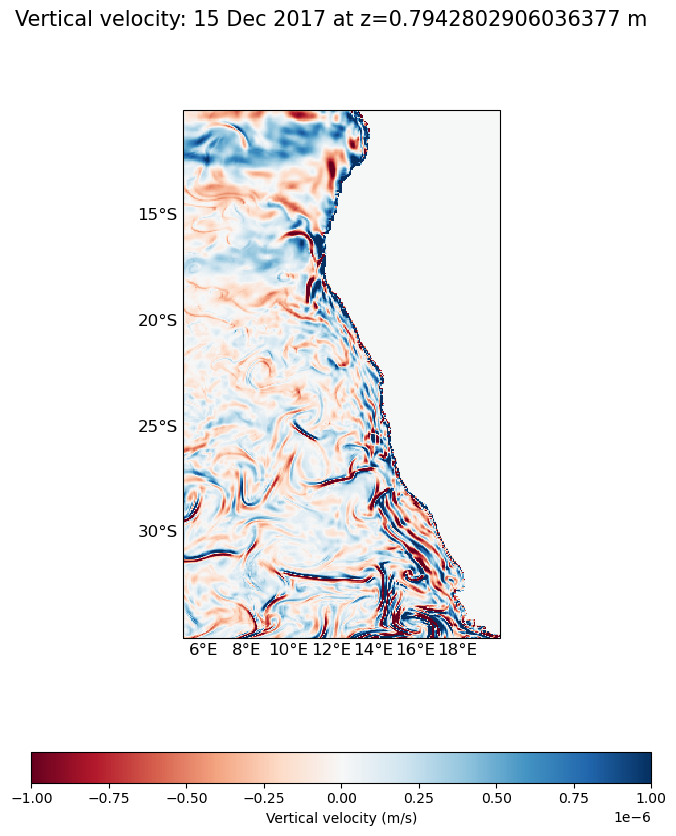

In [11]:

custom_size=12
fig = plt.figure(figsize=(8,10), dpi=100)
fig.suptitle("Vertical velocity: 15 Dec 2017 at z={0} m".format(w_ds.depthw[1].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=1)

# temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(w_ds.nav_lon[1249:1750, 1499:], w_ds.nav_lat[1249:1750, 1499:], w_ds.wo[0, 1, 1250:1750, 1500:], cmap="RdBu", vmin=-1e-06, vmax=1e-06)
# ax1.set_xlim(10,20)
# ax1.set_ylim(-35,-20)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,-10)
fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Vertical velocity (m/s)')

(-35.0, 0.0)

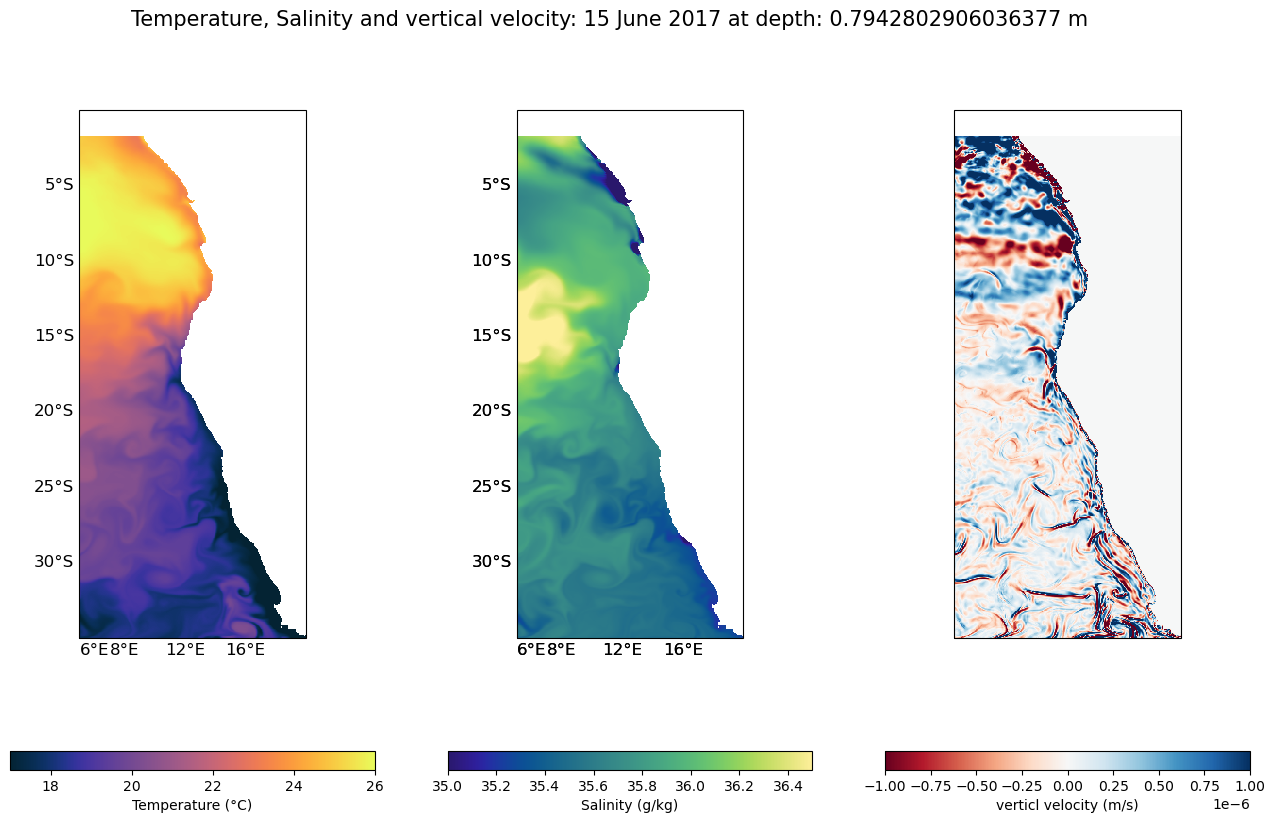

In [9]:
custom_size=12
level=1

fig = plt.figure(figsize=(16,10), dpi=100)
fig.suptitle("Temperature, Salinity and vertical velocity: 15 June 2017 at depth: {0} m".format(w_ds.depthw[level].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=3)

temp_min, temp_max = 17, 26
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(temp_ds.nav_lon[1249:1850, 1499:], temp_ds.nav_lat[1249:1850, 1499:], temp_ds.thetao[0, level, 1250:1850, 1500:], cmap=cmocean.cm.thermal, vmin=temp_min, vmax=temp_max)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,0)

fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Temperature (°C)')

sal_min, sal_max = 35, 36.5
ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm2 = ax2.pcolormesh(sal_ds.nav_lon[1249:1850, 1499:], sal_ds.nav_lat[1249:1850, 1499:], sal_ds.so[0, level, 1250:1850, 1500:], cmap=cmocean.cm.haline, vmin=sal_min, vmax=sal_max)

cbar2 = fig.colorbar(pcm2, ax=ax2, orientation='horizontal', label = 'Salinity (g/kg)')
ax2.set_xlim(5,20)
ax2.set_ylim(-35,0)

w_min, w_max = -1e-06, 1e-06
ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm3 = ax3.pcolormesh(w_ds.nav_lon[1249:1850, 1499:], w_ds.nav_lat[1249:1850, 1499:], w_ds.wo[0, level, 1250:1850, 1500:], cmap="RdBu", vmin=w_min, vmax=w_max)

cbar3 = fig.colorbar(pcm3, ax=ax3, orientation='horizontal', label = 'verticl velocity (m/s)')
ax3.set_xlim(5,20)
ax3.set_ylim(-35,0)

# plt.savefig(output_folder + '2017-12-31_TS.jpeg',bbox_inches='tight',
#             pad_inches=0.2)


In [9]:
print(np.nanmin(temp_ds.thetao[0, 0, 1250:1750, 1500:]), np.nanmax(temp_ds.thetao[0, 0, 1250:1750, 1500:]))
print(np.nanmin(sal_ds.so[0, 0, 1250:1750, 1500:]), np.nanmax(sal_ds.so[0, 0, 1250:1750, 1500:]))
print(np.nanmin(w_ds.wo[0, 0, 1250:1750, 1500:]), np.nanmax(w_ds.wo[0, 0, 1250:1750, 1500:]))

14.170859 28.633371
32.057583 36.959225
-8.944527e-07 6.8075116e-07


<h3> Plot mean of vertical velocities of the region for December 2017 at different levels</h3>
<p> Command to use to compute monthly means: </newline>
ncra -d depthw,29 -v wo /storage/shared/oceanparcels/input_data/NEMO16_CMCC/ROMEO.01_1d_wo_201706*.nc data/mean_Jun_2017_z100_wo.nc

In [23]:
data_path = '/nethome/manra003/data/'
file = 'mean_Dec_2017_z1_wo.nc'

mean_ds_wo1=xr.open_dataset(data_path+file)
print(np.nanmin(mean_ds_wo1['wo']), np.nanmax(mean_ds_wo1['wo']))



-7.5889904e-05 0.00015841358


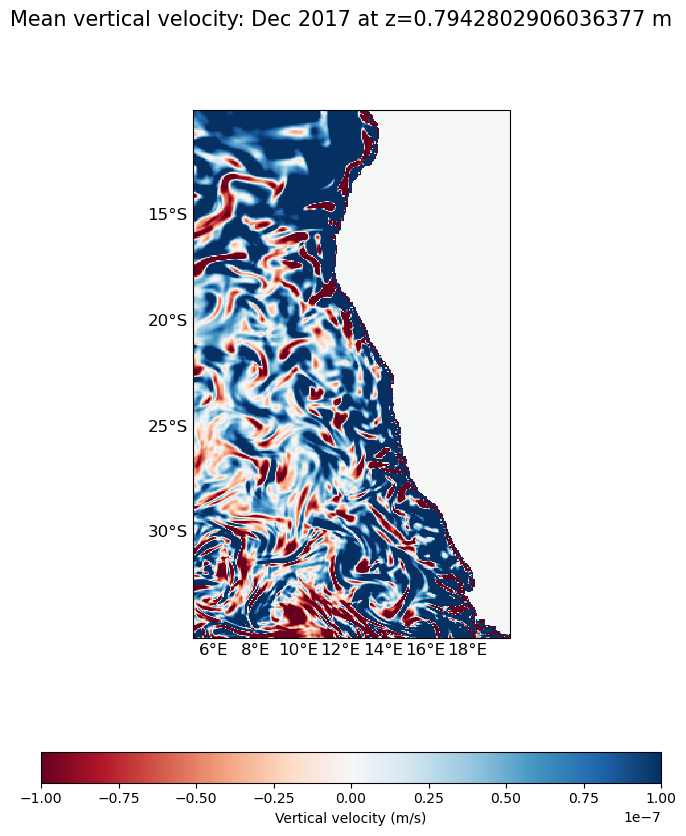

In [21]:

custom_size=12
fig = plt.figure(figsize=(8,10), dpi=100)
fig.suptitle("Mean vertical velocity: Dec 2017 at z={0} m".format(mean_ds_wo1.depthw[0].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=1)

# temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(mean_ds_wo1.nav_lon[1249:1750, 1499:], mean_ds_wo1.nav_lat[1249:1750, 1499:], mean_ds_wo1.wo[0, 0, 1250:1750, 1500:], cmap="RdBu", vmin=-1e-07, vmax=1e-07)
# ax1.set_xlim(10,20)
# ax1.set_ylim(-35,-20)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,-10)
fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Vertical velocity (m/s)')

In [22]:
file = 'mean_Dec_2017_z100_wo.nc'

mean_ds_wo1=xr.open_dataset(data_path+file)
print(np.nanmin(mean_ds_wo1['wo']), np.nanmax(mean_ds_wo1['wo']))

-0.0054304344 0.010743808


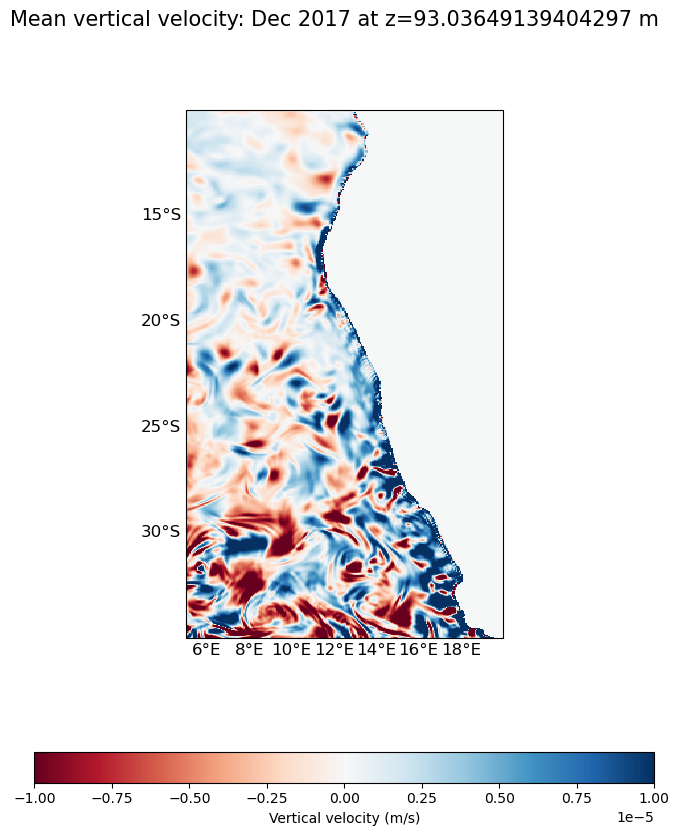

In [16]:

custom_size=12
fig = plt.figure(figsize=(8,10), dpi=100)
fig.suptitle("Mean vertical velocity: Dec 2017 at z={0} m".format(mean_ds_wo1.depthw[0].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=1)

# temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(mean_ds_wo1.nav_lon[1249:1750, 1499:], mean_ds_wo1.nav_lat[1249:1750, 1499:], mean_ds_wo1.wo[0, 0, 1250:1750, 1500:], cmap="RdBu", vmin=-1e-5, vmax=1e-5)
# ax1.set_xlim(10,20)
# ax1.set_ylim(-35,-20)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,-10)
fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Vertical velocity (m/s)')

In [24]:
data_path = '/nethome/manra003/data/'
file = 'mean_Jun_2017_z100_wo.nc'

mean_ds_wo1=xr.open_dataset(data_path+file)
print(np.nanmin(mean_ds_wo1['wo']), np.nanmax(mean_ds_wo1['wo']))

-0.005763749 0.015636478


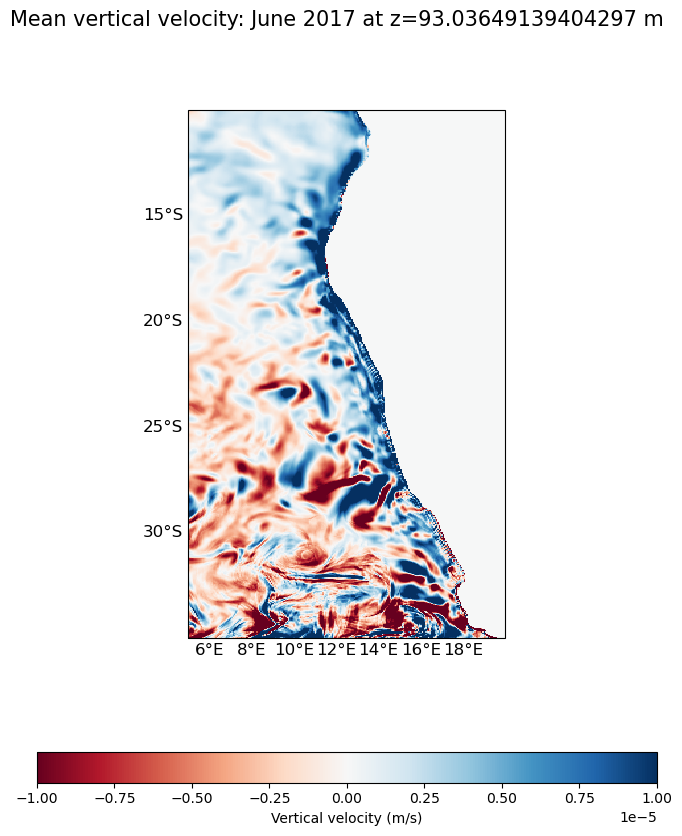

In [25]:

custom_size=12
fig = plt.figure(figsize=(8,10), dpi=100)
fig.suptitle("Mean vertical velocity: June 2017 at z={0} m".format(mean_ds_wo1.depthw[0].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=1)

# temp_min, temp_max = 17, 21
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

pcm1 = ax1.pcolormesh(mean_ds_wo1.nav_lon[1249:1750, 1499:], mean_ds_wo1.nav_lat[1249:1750, 1499:], mean_ds_wo1.wo[0, 0, 1250:1750, 1500:], cmap="RdBu", vmin=-1e-5, vmax=1e-5)
# ax1.set_xlim(10,20)
# ax1.set_ylim(-35,-20)
ax1.set_xlim(5,20)
ax1.set_ylim(-35,-10)
fig.colorbar(pcm1, ax=ax1, orientation='horizontal', label='Vertical velocity (m/s)')